In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dir_data = "C:/Users/chris/Documents/Projects/Names/Data/"

In [3]:
name_year_data = pd.read_parquet(dir_data+"name_year_data.parquet")
name_year_data

,Name,Year,Count_Female,Count_Male,Count_Total,Rank_Female,Rank_Male,Rate_Female,Rate_Male,Percent_Female,Percent_Male
1223786,Mary,1900,16705,75,16780,1.0,230.0,0.055723,0.000498,0.995530,0.004470
868794,John,1900,46,9829,9875,499.0,1.0,0.000153,0.065320,0.004658,0.995342
1823156,William,1900,44,8579,8623,509.0,2.0,0.000147,0.057013,0.005103,0.994897
790651,James,1900,41,7245,7286,524.0,3.0,0.000137,0.048148,0.005627,0.994373
711149,Helen,1900,6342,18,6360,2.0,578.0,0.021155,0.000120,0.997170,0.002830
...,...,...,...,...,...,...,...,...,...,...,...
1882627,Zyen,2023,0,5,5,17534.0,12190.0,0.000000,0.000003,0.000000,1.000000
1883644,Zymirr,2023,0,5,5,17534.0,12190.0,0.000000,0.000003,0.000000,1.000000
1883650,Zyn,2023,5,0,5,15121.0,14150.0,0.000003,0.000000,1.000000,0.000000
1883855,Zyquan,2023,0,5,5,17534.0,12190.0,0.000000,0.000003,0.000000,1.000000


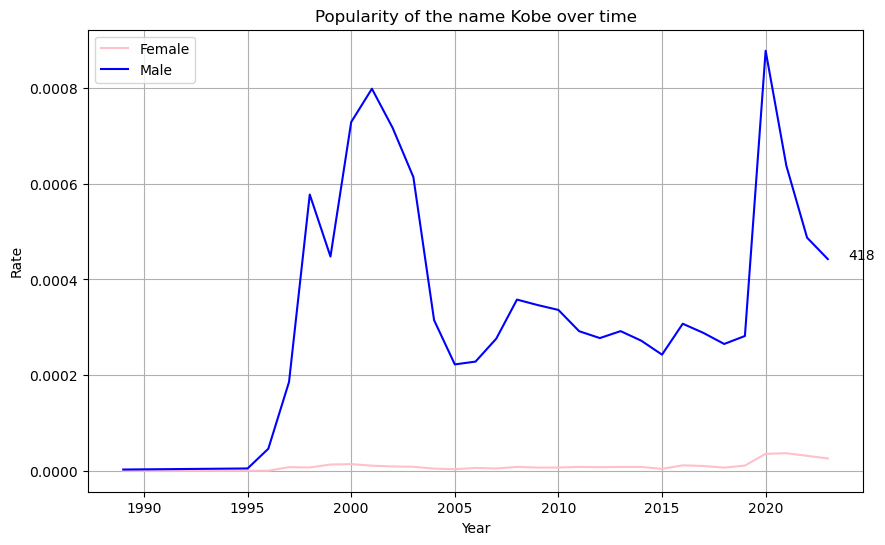

In [47]:
def plot_name_popularity(name):
    # Filter the dataframe for the given name
    name_data = name_year_data[name_year_data['Name'] == name]
    
    # Check the maximum Percent_Female and Percent_Male
    max_percent_female = name_data['Percent_Female'].tail(1).values[0]
    max_percent_male = name_data['Percent_Male'].tail(1).values[0]
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    
    if max_percent_female > 0.05 and max_percent_male > 0.05:
        plt.plot(name_data['Year'], name_data['Rate_Female'], label='Female', color='pink')
        plt.plot(name_data['Year'], name_data['Rate_Male'], label='Male', color='blue')
    elif max_percent_female > max_percent_male:
        plt.plot(name_data['Year'], name_data['Rate_Female'], label='Female', color='pink')
    else:
        plt.plot(name_data['Year'], name_data['Rate_Male'], label='Male', color='blue')
    
    # Annotate the final year value with the name's rank
    final_year = name_data['Year'].max()
    final_data = name_data[name_data['Year'] == final_year]
    
    if max_percent_female > max_percent_male:
        rank = final_data['Rank_Female'].values[0].astype(int)
        plt.annotate(f'{rank}', xy=(final_year, final_data['Rate_Female'].values[0]), 
                     xytext=(final_year + 1, final_data['Rate_Female'].values[0]))
    else:
        rank = final_data['Rank_Male'].values[0].astype(int)
        plt.annotate(f'{rank}', xy=(final_year, final_data['Rate_Male'].values[0]), 
                     xytext=(final_year + 1, final_data['Rate_Male'].values[0]))

    plt.xlabel('Year')
    plt.ylabel('Rate')
    plt.title(f'Popularity of the name {name} over time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_name_popularity('Kobe')